In [1]:
import sys
projects_home = '/home/aseem/projects/ud120-projects'
sys.path.append(projects_home + '/choose_your_own')
sys.path.append("/home/aseem/projects/website/udacity_data_science_notes/intro_machine_learning")

# Lesson 6 - Regression

## Continuous Supervised learning
- The output can be any number of values
- When dealing with numbers which don't really have a order then that feature is discrete else continuous

## Slope and Intercept

![](slope_and_intercept.png)

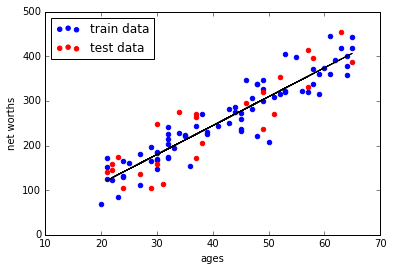

In [2]:
%matplotlib inline

import random
import numpy
import matplotlib
import pickle

import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

def get_data():
    ages = pickle.load( open(projects_home + "/outliers/practice_outliers_ages.pkl", "r") )
    net_worths = pickle.load( open(projects_home + "/outliers/practice_outliers_net_worths.pkl", "r") )

    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    return train_test_split(ages, net_worths, test_size=0.1, random_state=42)


def show_plot(reg):
    plt.clf()
    plt.scatter(ages_train, net_worths_train, color="b", label="train data")
    plt.scatter(ages_test, net_worths_test, color="r", label="test data")
    plt.plot(ages_test, reg.predict(ages_test), color="black")
    plt.legend(loc=2)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()

    
def ageNetWorthData():

    random.seed(42)
    numpy.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
    
    ### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    from sklearn.cross_validation import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages_train, ages_test, net_worths_train, net_worths_test

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)
show_plot(reg)

In [3]:
print "net worth prediction: ", reg.predict([27])
print "slope: ", reg.coef_
print "intercept: ", reg.intercept_

print "\n stats on test dataset"
print "r-squared score: ", reg.score(ages_test, net_worths_test)

print "\n stats on train dataset"
print "r-squared score: ", reg.score(ages_train, net_worths_train)

net worth prediction:  [[ 160.43205453]]
slope:  [[ 6.47354955]]
intercept:  [-14.35378331]

 stats on test dataset
r-squared score:  0.812365729231

 stats on train dataset
r-squared score:  0.874588235822


/home/aseem/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [4]:
### get Katie's net worth (she's 27)
### sklearn predictions are returned in an array, so you'll want to index into
### the output to get what you want, e.g. net_worth = predict([[27]])[0][0] (not
### exact syntax, the point is the [0] at the end). In addition, make sure the
### argument to your prediction function is in the expected format - if you get
### a warning about needing a 2d array for your data, a list of lists will be
### interpreted by sklearn as such (e.g. [[27]]).

prediction = reg.predict([[27]])

km_net_worth = prediction[0][0]

### get the slope
### again, you'll get a 2-D array, so stick the [0][0] at the end
slope = reg.coef_[0][0] ### fill in the line of code to get the right value

### get the intercept
### here you get a 1-D array, so stick [0] on the end to access
### the info we want
intercept = reg.intercept_[0] ### fill in the line of code to get the right value


### get the score on test data
test_score = reg.score(ages_test, net_worths_test) ### fill in the line of code to get the right value


### get the score on the training data
training_score = reg.score(ages_train, net_worths_train) ### fill in the line of code to get the right value

## Linear Regression Errors

- error = (actual value) - (predicted value)
- the best regression is the one that minimizes the sum of squared errors
- several algorithms
    - ordinary least squares (linear regression used in sklearn)
    - gradient descent

![](minimize_square.png)
![](sse.png)

More number of data points may lead to a larger sum of squares and hence we may consider that the regression with lesser data points is better. Hence sum of sqaures is not perfect

## R Squared Metric for Regression

r sqaured metric explains "how much of my change in ouput is explained by the change in my input"

0.0 < r ^ 2 < 1.0

less means that the regression is not doing a very good job of capturing the trend in the data. 

It is independent of number of data points generally. This is more reliable than sum of squared errors if number of data points can change

## Visualizing - What data makes a good regression
- there is some data which is not good
- there is some data which is just going to be difficult to fit with a regression

![](visual.png)

## Comparing classification and regression

![](classification_and_regression.png)

## Multi variate regression
- when we do predictions based on multiple input variable
- e.g. we calculate net worth based on IQ, age and education